## Importing Libraries

In [18]:
# EDA
import pandas as pd
import numpy as np
import datetime as dt


#Exploration
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import seaborn as sns
import missingno as ms


## Understanding the problem statement

The aim is to build a predictive model that would hel find out the sales of each product at a particular store, We want to know to product and store properties that play a role in increasing sales.

In [19]:
# Read in files
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
train.shape, test.shape 


((8523, 12), (5681, 11))

In [20]:
# let us combine the two datasets into one so that we don't have to repeat our steps and clean the data twice.
# First let us make a soure column to specify the origins of each row for splitting latter
train['source'] = 'train'
test['source'] = 'test'
df = pd.concat([train, test], ignore_index = True)
df.shape

(14204, 13)

#### This output gives us new dataset, with new missing data as we concatenated the dataset


In [21]:
# lets drop duplicate data
df.drop_duplicates(inplace = True)
df.shape


(14204, 13)

No duplicated data

In [22]:
# What data is missing 
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

#### The Target data in. the dataset is ITEM_OUTLET_SALES so we need not worry about the missing data at this point but the other columns have sgnificant amounts of missing data hence so they must be handled

## Understanding our data 

In [23]:
df.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 14203
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  source                     14204 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usag

In [25]:
# So statistics on numerical data
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Observations from the descriptive statisitcis:
    Item Visibility has a min value of 0, this is flawed as items within te store are sold hence they myst be visible
    Outlet_establishment_years can be used to determine age of the store

In [26]:
# Categorical data
df.apply(lambda x: len(x.unique()))

Item_Identifier               1559
Item_Weight                    416
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      4
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3494
source                           2
dtype: int64

Item_Identifier: This tells us that tere are 1559 different items in the dataset
Item_Type: 16 different types of calues
Item_Fat_Content: 5 different levels
Outlet_identifier : This tells us that there are 10 outlets
Outlet_Type: 4 different outlet types
Outlet_Size: has 4 different value types

In [27]:
# Let us further filter the categorical data
categoricals = [x for x in [i for i in df.dtypes.index if df.dtypes[i] == 'object'] if x not in ['Item_Identifier', 'Outlet_Identifier']]

for i in categoricals :
    print(f'Frequency of categories for {i} \n')
    print(df[i].value_counts())

Frequency of categories for Item_Fat_Content 

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64
Frequency of categories for Item_Type 

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64
Frequency of categories for Outlet_Size 

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64
Frequency of categories for Outlet_Location_Type 

Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64
Frequency of categories for Ou

### From this we can see the count of the occurances of all categoricals within the dataset,
#### Notes
Item_Fat_Content has been represent in 3 different ways, we must reformat it.
Item_Type: Some categories do not appear with substantial Numbers
Outlet_type: Can we merge supermarket 2 & 3?


#### Filling in the Item Weight and Outlet Size columns

In [28]:
#Imputing missing values
item_avg_weight = df.groupby('Item_Identifier')['Item_Weight'].mean()
miss_item_bool = df['Item_Weight'].isnull()
#Imputing the missing data
print(f'Original missing data: {miss_item_bool.sum()}')
df.loc[miss_item_bool,'Item_Weight'] = df.loc[miss_item_bool,'Item_Identifier'].apply(lambda x: item_avg_weight[x])
print(f'New data: {df["Item_Weight"].isnull().sum()}')

Original missing data: 2439
New data: 0


In [29]:
from scipy.stats import mode

#Determing the mode for each
outlet_size_mode = df.pivot_table(values='Outlet_Size', 
                                  columns='Outlet_Type',
                                  aggfunc=(lambda x : mode(x.astype('str')).mode[0]))
print ('Mode for each Outlet_Type:')
print (outlet_size_mode)

#Get a boolean variable specifying missing Item_Weight values
missing_values = df['Outlet_Size'].isnull() 

#Impute data and check #missing values before and after imputation to confirm
print ('\nOrignal #missing: %d'% sum(missing_values))
df.loc[missing_values,'Outlet_Size'] = df.loc[missing_values,'Outlet_Type'].apply(lambda x: outlet_size_mode[x])
print (sum(df['Outlet_Size'].isnull()))

Mode for each Outlet_Type:
Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size           nan             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  

Orignal #missing: 4016
0


/var/folders/5n/c9_z_rh96blb2gjxn2v7nmtc0000gn/T/ipykernel_3153/1026461311.py:6: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  aggfunc=(lambda x : mode(x.astype('str')).mode[0]))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:110: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "


In [30]:
df['Outlet_Size'].value_counts()

Small     7071
Medium    4655
High      1553
nan        925
Name: Outlet_Size, dtype: int64

## Data Visualization

### Lets start looking Outlet_Size, Outlet_Location_Type, and Outlet_Type distribution in Item_Outlet_Sale

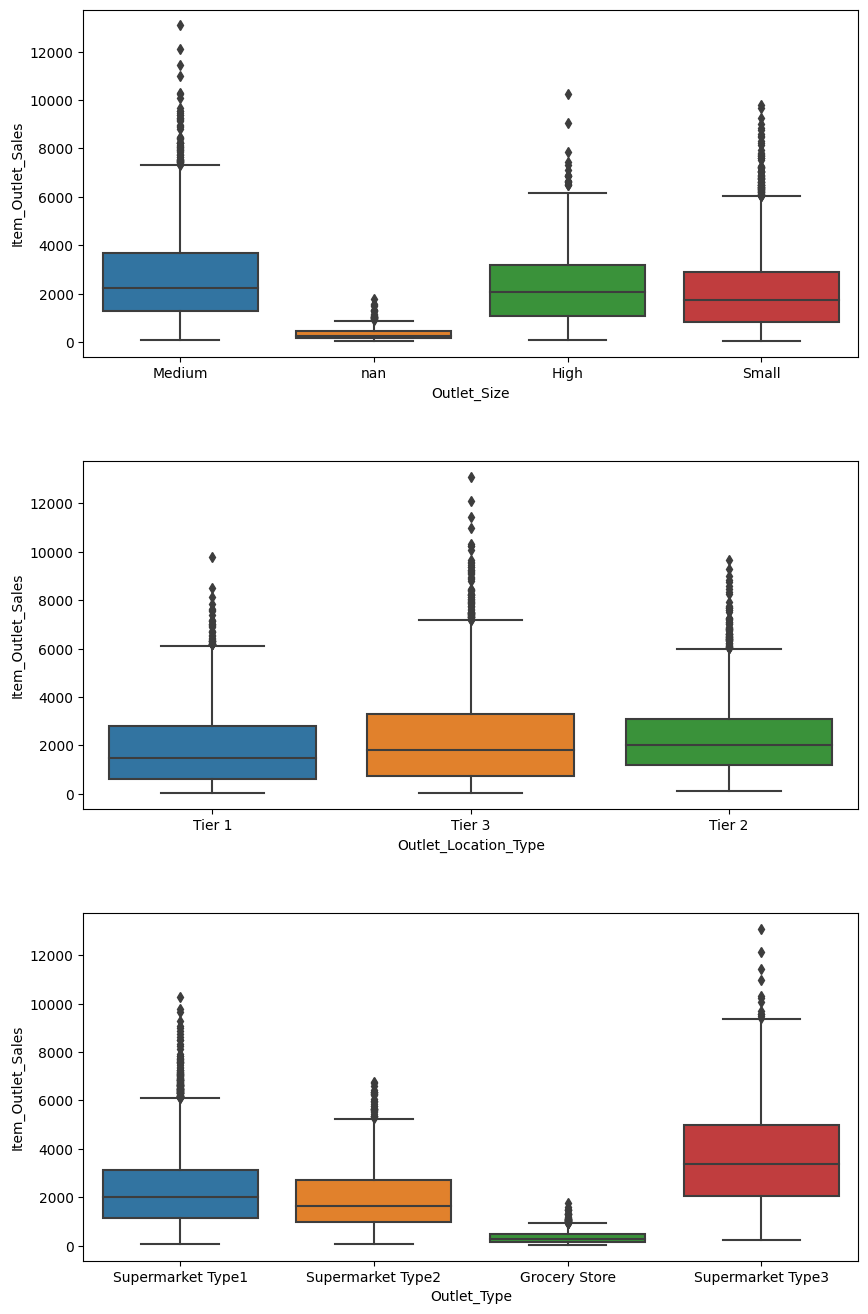

In [31]:
plt.figure(figsize = (10,9))

plt.subplot(311)
sns.boxplot(x='Outlet_Size', y='Item_Outlet_Sales', data = df)

plt.subplot(312)
sns.boxplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=df)

plt.subplot(313)
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=df)

plt.subplots_adjust(wspace = 0.1, hspace = 0.3,top = 1.5)

plt.show()


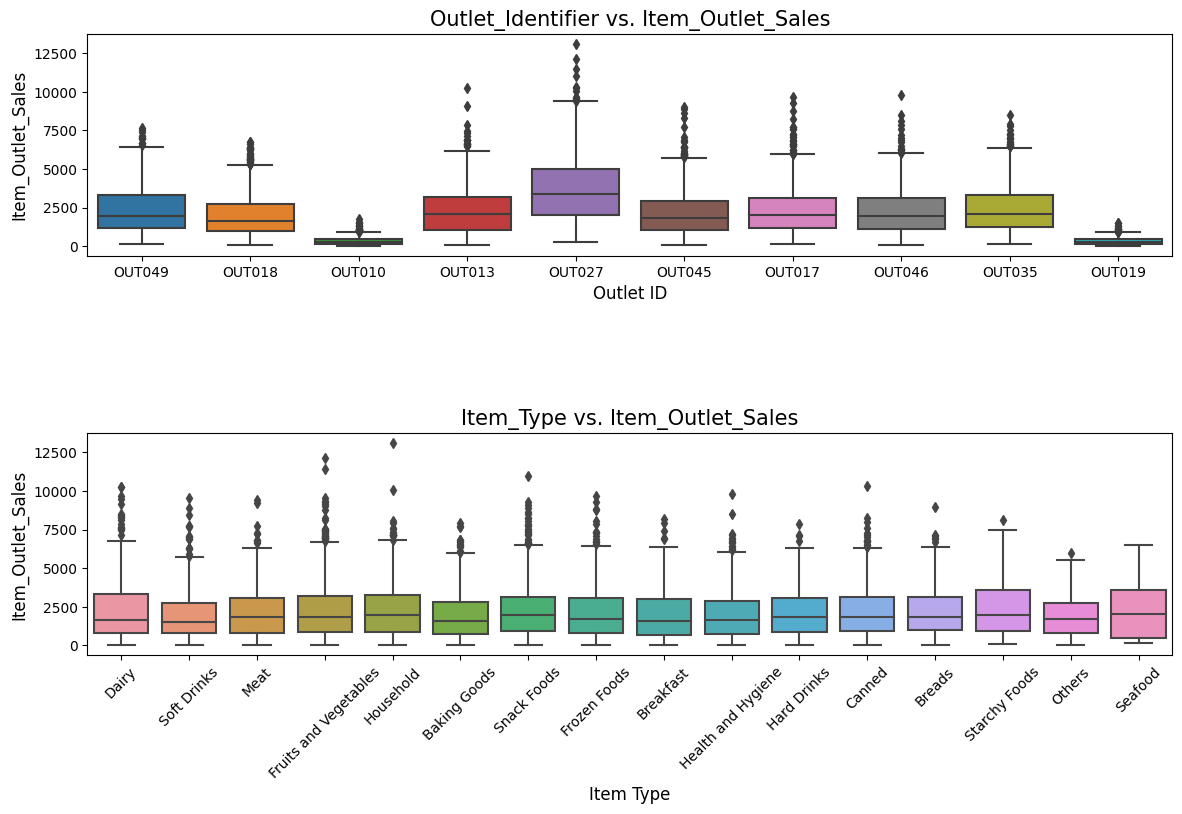

In [32]:
plt.figure(figsize = (14,9))

plt.subplot(211)
ax = sns.boxplot(x='Outlet_Identifier', y='Item_Outlet_Sales', data=df)
ax.set_title("Outlet_Identifier vs. Item_Outlet_Sales", fontsize=15)
ax.set_xlabel("Outlet ID", fontsize=12)
ax.set_ylabel("Item_Outlet_Sales", fontsize=12)

plt.subplot(212)
ax = sns.boxplot(x='Item_Type', y='Item_Outlet_Sales', data=df)
ax.set_title("Item_Type vs. Item_Outlet_Sales", fontsize=15)
ax.set_xlabel("Item Type", fontsize=12)
ax.set_ylabel("Item_Outlet_Sales", fontsize=12)

plt.subplots_adjust(hspace = 0.8, top = 0.8)
plt.setp(ax.get_xticklabels(), rotation=45)

plt.show()

## Feature Engineering

In [34]:
#Determine average visibility of a product
visibility = df.pivot_table(values='Item_Visibility', index='Item_Identifier')

#Impute 0 values with mean visibility of that product:
missing_values = (df['Item_Visibility'] == 0)

print ('Number of 0 values initially: %d'%sum(missing_values))
df.loc[missing_values,'Item_Visibility'] = df.loc[missing_values,'Item_Identifier'].apply(lambda x: visibility.at[x, 'Item_Visibility'])
print ('Number of 0 values after modification: %d'%sum(df['Item_Visibility'] == 0))

Number of 0 values initially: 879
Number of 0 values after modification: 0


## Grouping the item types 

<AxesSubplot:xlabel='Item_Combined', ylabel='count'>

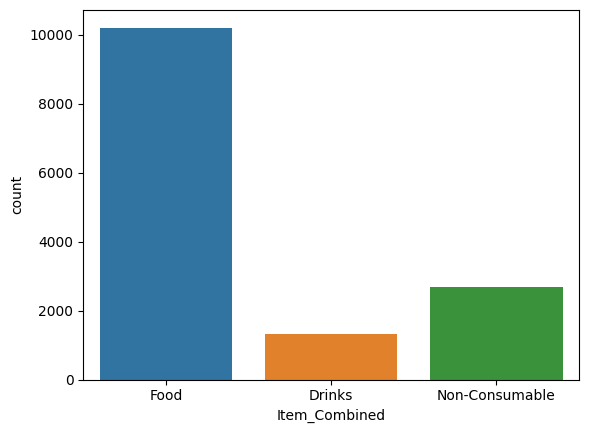

In [35]:
# Let us group the item types
df['Item_Combined'] = df['Item_Identifier'].apply(lambda x : x[0:2])
df['Item_Combined'] = df['Item_Combined'].map({'FD':'Food', 'NC': 'Non-Consumable', 'DR':'Drinks'})
sns.countplot(data = df, x='Item_Combined')


#### There are more food items, than Non-Consumable and Drinks are represented least in our dataset

## Getting the age of the stores

In [36]:
# The dataset is taken from the year 2013
df['Outlet_Age'] = 2013 - df['Outlet_Establishment_Year']
x,y = df['Outlet_Age'].min(), df['Outlet_Age'].max()
print(f'The lowest age is {x} and the highest age is {y}')


The lowest age is 4 and the highest age is 28


## Modify categories of Item_Fat_Content

In [37]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].apply(lambda x : x.replace('LF', "Low Fat").replace('reg', 'Regular').capitalize())
df['Item_Fat_Content'].value_counts()

Low fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

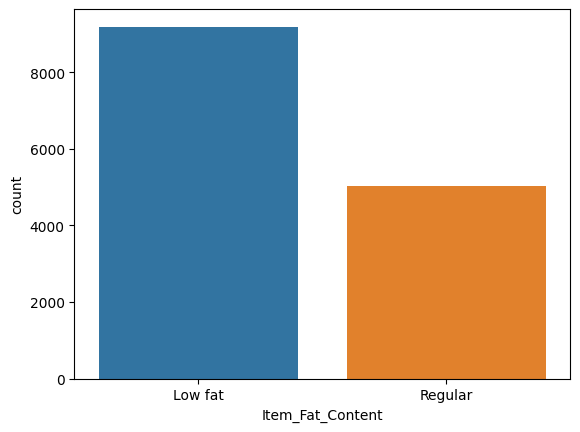

In [38]:
# Plotting the Item Fat Values
sns.countplot(data = df, x='Item_Fat_Content')

#### There are more lowfat items that Regular

### Creating a Non-Edible Datatype as not all Item types are edible

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

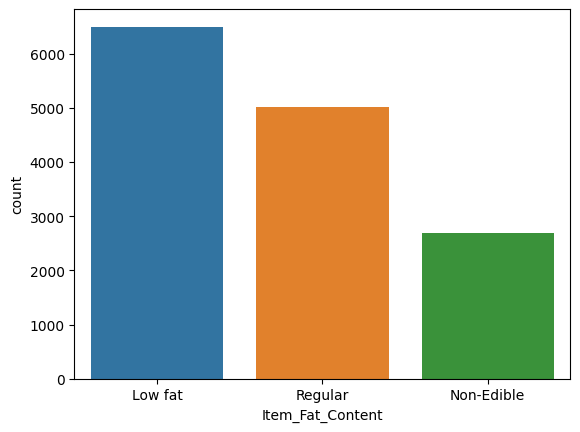

In [39]:
#Mark non-consumables as separate category in low_fat: 
df.loc[df['Item_Combined']=="Non-Consumable",'Item_Fat_Content'] = "Non-Edible"

sns.countplot(data = df, x= 'Item_Fat_Content')

## Data Preprocessing

In [40]:
from sklearn.preprocessing import LabelEncoder
# Creating an outlet column so it is numerical as oppposed to categorical
le = LabelEncoder()
df['Outlet'] = le.fit_transform(df['Outlet_Identifier'])

var_conv = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Combined','Outlet_Type','Outlet']
for i in var_conv:
    df[i] = le.fit_transform(df[i])
df.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Item_Combined,Outlet_Age,Outlet
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,1,3735.1380,train,1,14,9
1,DRC01,5.92,2,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,2,443.4228,train,0,4,3
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,1,0,1,2097.2700,train,1,14,9
3,FDX07,19.20,2,0.017834,Fruits and Vegetables,182.0950,OUT010,1998,3,2,0,732.3800,train,1,15,0
4,NCD19,8.93,1,0.009780,Household,53.8614,OUT013,1987,0,2,1,994.7052,train,2,26,1


In [41]:
#One Hot Encoding
data = pd.get_dummies(df, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type',
                              'Item_Combined','Outlet'])
data

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,source,Outlet_Age,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,9.30,0.016047,Dairy,249.8092,OUT049,1999,3735.1380,train,14,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,5.92,0.019278,Soft Drinks,48.2692,OUT018,2009,443.4228,train,4,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,17.50,0.016760,Meat,141.6180,OUT049,1999,2097.2700,train,14,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,19.20,0.017834,Fruits and Vegetables,182.0950,OUT010,1998,732.3800,train,15,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.93,0.009780,Household,53.8614,OUT013,1987,994.7052,train,26,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,0.013496,Snack Foods,141.3154,OUT046,1997,NaN,test,16,...,0,0,0,0,0,0,0,0,1,0
14200,FDD47,7.60,0.142991,Starchy Foods,169.1448,OUT018,2009,NaN,test,4,...,0,0,0,1,0,0,0,0,0,0
14201,NCO17,10.00,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,test,11,...,0,0,0,0,0,0,0,1,0,0
14202,FDJ26,15.30,0.088380,Canned,214.6218,OUT017,2007,NaN,test,6,...,0,0,1,0,0,0,0,0,0,0


In [42]:
# new dataframe info
data.shape, data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 14203
Data columns (total 37 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Visibility            14204 non-null  float64
 3   Item_Type                  14204 non-null  object 
 4   Item_MRP                   14204 non-null  float64
 5   Outlet_Identifier          14204 non-null  object 
 6   Outlet_Establishment_Year  14204 non-null  int64  
 7   Item_Outlet_Sales          8523 non-null   float64
 8   source                     14204 non-null  object 
 9   Outlet_Age                 14204 non-null  int64  
 10  Item_Fat_Content_0         14204 non-null  uint8  
 11  Item_Fat_Content_1         14204 non-null  uint8  
 12  Item_Fat_Content_2         14204 non-null  uint8  
 13  Outlet_Location_Type_0     14204 non-null  uin

((14204, 37), None)

We have the smae number of rows, but 36 columns now and the data in the dummy columns have a datatype of uint8

In [43]:
data[['Item_Fat_Content_0','Item_Fat_Content_1','Item_Fat_Content_2']]

,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2
0,1,0,0
1,0,0,1
2,1,0,0
3,0,0,1
4,0,1,0
...,...,...,...
14199,0,0,1
14200,0,0,1
14201,0,1,0
14202,0,0,1


In [44]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Item_Outlet_Sales            5681
source                          0
Outlet_Age                      0
Item_Fat_Content_0              0
Item_Fat_Content_1              0
Item_Fat_Content_2              0
Outlet_Location_Type_0          0
Outlet_Location_Type_1          0
Outlet_Location_Type_2          0
Outlet_Size_0                   0
Outlet_Size_1                   0
Outlet_Size_2                   0
Outlet_Size_3                   0
Outlet_Type_0                   0
Outlet_Type_1                   0
Outlet_Type_2                   0
Outlet_Type_3                   0
Item_Combined_0                 0
Item_Combined_1                 0
Item_Combined_2                 0
Outlet_0                        0
Outlet_1                        0
Outlet_2      

## Splitting into train and test sets

In [45]:
# Let us drop these columns as they have been converted to other types
data.drop(['Item_Type','Outlet_Establishment_Year'],axis=1,inplace=True)

#Divide into test and train:
train = data.loc[data['source']=="train"]
test = data.loc[data['source']=="test"]

#Drop unnecessary columns:
test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)

#Export files as modified versions:
train.to_csv("train_v2.csv",index=False)
test.to_csv("test_v2.csv",index=False)

/var/folders/5n/c9_z_rh96blb2gjxn2v7nmtc0000gn/T/ipykernel_3153/989176253.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)
/var/folders/5n/c9_z_rh96blb2gjxn2v7nmtc0000gn/T/ipykernel_3153/989176253.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop(['source'],axis=1,inplace=True)


In [46]:
len(train.columns)

34

# Model Building

In [47]:
#Define target and ID columns:
target = 'Item_Outlet_Sales'
IDcol = ['Item_Identifier','Outlet_Identifier']

from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error


def modelfit(alg, dtrain, dtest, predictors, target, IDcol, filename):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])

    #Perform cross-validation:
    cv_score = cross_val_score(alg, dtrain[predictors], dtrain[target], cv=20)
    cv_score = np.sqrt(np.abs(cv_score))
    
    #Print model report:
    print ("\nModel Report")
    print ("RMSE : %.4g" % np.sqrt(mean_squared_error(dtrain[target].values, dtrain_predictions)))
    print ("CV Score : Mean: %.4g | Std: %.4g | Min: %.4g | Max: %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    
    #Predict on testing data:
    dtest[target] = alg.predict(dtest[predictors])
    
    #Export submission file:
    IDcol.append(target)
    submission = pd.DataFrame({ x: dtest[x] for x in IDcol})
    submission.to_csv(filename, index=False)

## Linear Regression


Model Report
RMSE : 1127
CV Score : Mean: 0.7475 | Std: 0.01943 | Min: 0.6983 | Max: 0.7848


/var/folders/5n/c9_z_rh96blb2gjxn2v7nmtc0000gn/T/ipykernel_3153/3357063623.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dtest[target] = alg.predict(dtest[predictors])


<AxesSubplot:title={'center':'Model Coefficients'}>

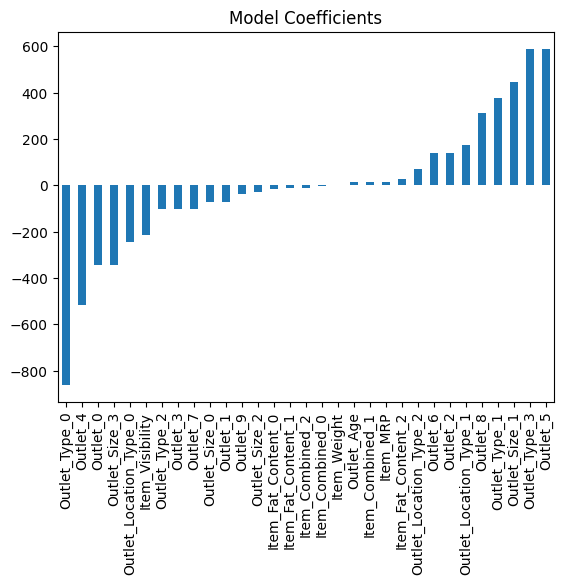

In [48]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
predictors = [x for x in train.columns if x not in [target]+IDcol]
# print predictors
lr = LinearRegression()
modelfit(lr, train, test, predictors, target, IDcol, 'lr.csv')
coef1 = pd.Series(lr.coef_, predictors).sort_values()
coef1.plot(kind='bar', title='Model Coefficients')


Model Report
RMSE : 1127
CV Score : Mean: 0.7475 | Std: 0.01943 | Min: 0.6983 | Max: 0.7848


/var/folders/5n/c9_z_rh96blb2gjxn2v7nmtc0000gn/T/ipykernel_3153/3357063623.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dtest[target] = alg.predict(dtest[predictors])


<AxesSubplot:title={'center':'Model Coefficients'}>

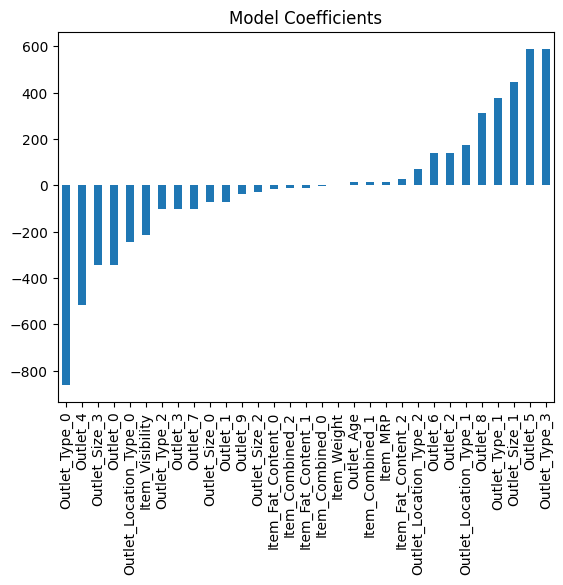

In [49]:
from sklearn.linear_model import Ridge 
predictors = [x for x in train.columns if x not in [target]+IDcol]
#print predictors
rdg = Ridge(alpha = 0.05)
modelfit(rdg, train, test, predictors, target, IDcol, 'rdg.csv')
coef2 = pd.Series(rdg.coef_, predictors).sort_values()
coef2.plot(kind='bar', title='Model Coefficients')

## Decision Tree


Model Report
RMSE : 1060
CV Score : Mean: 0.7659 | Std: 0.0249 | Min: 0.708 | Max: 0.8187


/var/folders/5n/c9_z_rh96blb2gjxn2v7nmtc0000gn/T/ipykernel_3153/3357063623.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dtest[target] = alg.predict(dtest[predictors])


<AxesSubplot:title={'center':'Feature Importances'}>

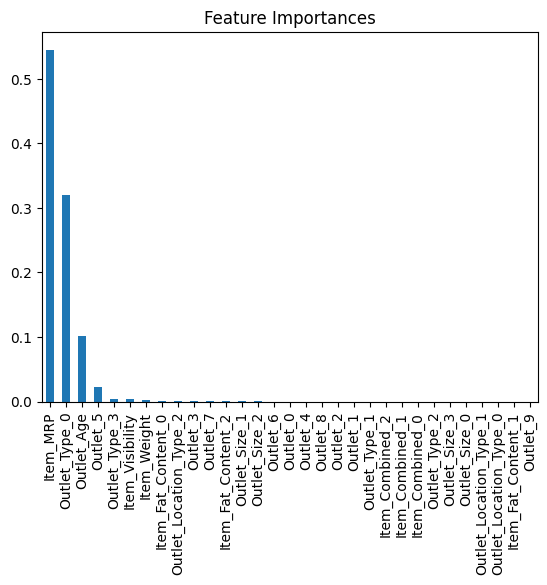

In [50]:
from sklearn.tree import DecisionTreeRegressor
predictors = [x for x in train.columns if x not in [target]+IDcol]
dtr = DecisionTreeRegressor(max_depth = 15, min_samples_leaf = 100)
modelfit(dtr, train, test, predictors, target, IDcol, 'dtr.csv')
coef3 = pd.Series(dtr.feature_importances_, predictors).sort_values(ascending = False)
coef3.plot(kind='bar', title = 'Feature Importances')